# Explore Intensive Care Dataset

This notebook is used to explore the `nice-covid-19-intensive-care.csv` dataset. It contains various graph that visualize the data in the dataset.

In [1]:
import pandas as pd

## Load dataset

In [2]:
df = pd.read_csv("../data/processed/nice-covid-19-intensive-care.csv")

In [3]:
df["Datum"] = pd.to_datetime(df["Datum"])
df["NieuwOpgenomenBewezen"] = df["NieuwOpgenomenBewezen"].astype(int)
df["OpgenomenCumulatief"] = df["OpgenomenCumulatief"].astype(int)
df["OverleeftCumulatief"] = df["OverleeftCumulatief"].astype(int)
df["OverledenCumulatief"] = df["OverledenCumulatief"].astype(int)
df["Opgenomen"] = df["Opgenomen"].astype(int)
df["IntensiveCare"] = df["IntensiveCare"].astype(int)
df["NieuwOpgenomenVerdacht"] = df["NieuwOpgenomenVerdacht"].astype(int)

## Inspect dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datum                   109 non-null    datetime64[ns]
 1   OverledenCumulatief     109 non-null    int64         
 2   NieuwOpgenomenBewezen   109 non-null    int64         
 3   OverleeftCumulatief     109 non-null    int64         
 4   NieuwOpgenomenVerdacht  109 non-null    int64         
 5   IntensiveCare           109 non-null    int64         
 6   Opgenomen               109 non-null    int64         
 7   OpgenomenCumulatief     109 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 6.9 KB


In [5]:
df.head()

,Datum,OverledenCumulatief,NieuwOpgenomenBewezen,OverleeftCumulatief,NieuwOpgenomenVerdacht,IntensiveCare,Opgenomen,OpgenomenCumulatief
0,2020-02-27,0,1,0,0,3,6,6
1,2020-02-28,0,0,0,1,4,7,7
2,2020-02-29,0,0,0,0,3,8,8
3,2020-03-01,0,2,0,0,4,10,10
4,2020-03-02,0,0,0,0,4,9,10


In [6]:
df.tail()

,Datum,OverledenCumulatief,NieuwOpgenomenBewezen,OverleeftCumulatief,NieuwOpgenomenVerdacht,IntensiveCare,Opgenomen,OpgenomenCumulatief
104,2020-06-10,842,3,1569,0,49,114,2901
105,2020-06-11,842,1,1574,1,49,111,2903
106,2020-06-12,842,2,1577,2,47,108,2907
107,2020-06-13,842,2,1577,0,47,108,2909
108,2020-06-14,842,0,1577,0,47,107,2909


## Visualize hospitalized (per day)

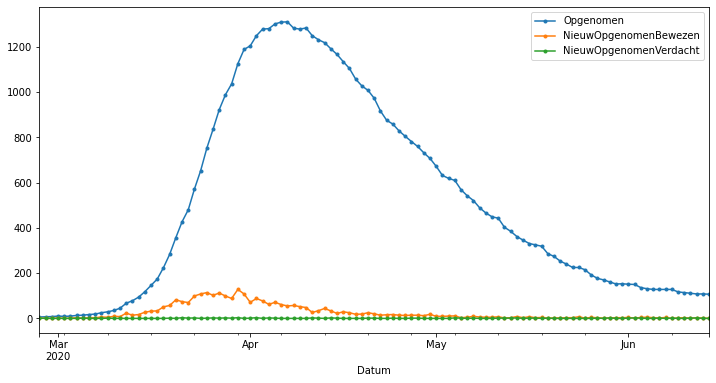

In [7]:
df.plot(
    x="Datum",
    y=["Opgenomen", "NieuwOpgenomenBewezen", "NieuwOpgenomenVerdacht"],
    figsize=(12,6),
    style=".-",
)

## Visualize intensive cares (per day)

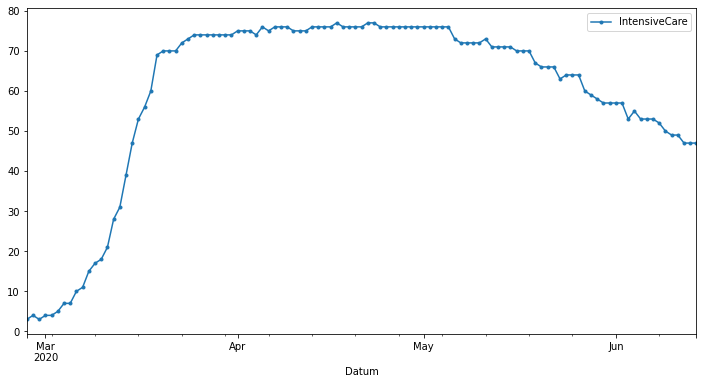

In [8]:
df.plot(
    x="Datum",
    y=["IntensiveCare"],
    figsize=(12,6),
    style=".-",
)

## Visualize total (per day)

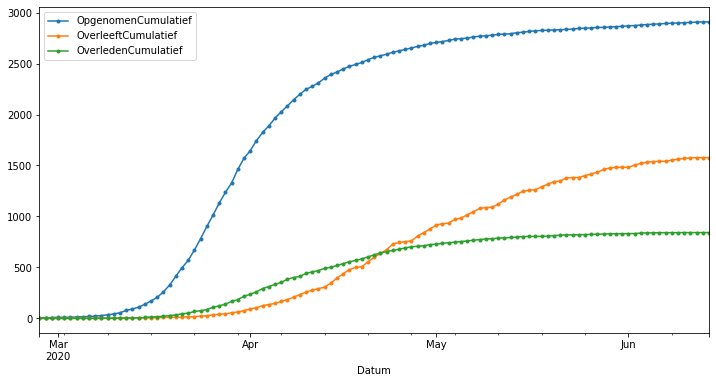

In [9]:
df.plot(
    x="Datum",
    y=["OpgenomenCumulatief", "OverleeftCumulatief", "OverledenCumulatief"],
    figsize=(12,6),
    style=".-",
)

## Visualize difference (per day)

In [10]:
df["OpgenomenCumulatiefDiff"] = df["OpgenomenCumulatief"].diff()
df["OverleeftCumulatiefDiff"] = df["OverleeftCumulatief"].diff()
df["OverledenCumulatiefDiff"] = df["OverledenCumulatief"].diff()

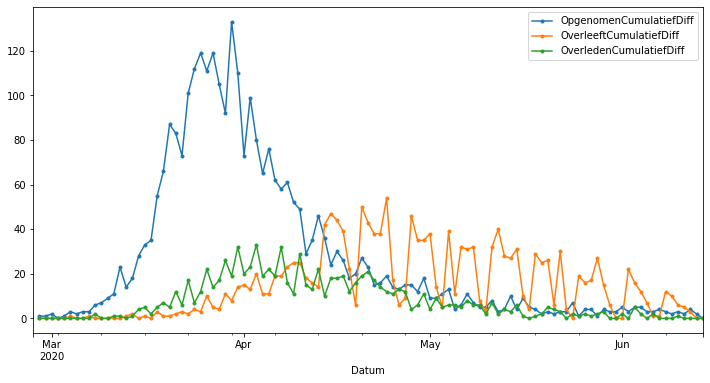

In [11]:
df.plot(
    x="Datum",
    y=["OpgenomenCumulatiefDiff", "OverleeftCumulatiefDiff", "OverledenCumulatiefDiff"],
    figsize=(12,6),
    style=".-",
)